In [68]:
%reload_ext autoreload
%autoreload 2
default_figsize=(14,12)

In [69]:
import datasets
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 12)

dataset_name = "liu"
dataset_module = datasets.datasets_by_name_all[dataset_name]
x,y,metadata = dataset_module.load(dropna=True,verbose=True)
y = datasets.map_y_em(y,dataset_name)

# generate dataframe with both x and y
xy = pd.concat([x,y],axis=1)
xy.describe()

,umag,gmag,rmag,imag,Hamag,Jmag,Hmag,Kmag,em
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,15.111851,14.504733,13.592100,12.929715,13.175018,12.020854,11.785267,11.635587,0.341637
std,1.816931,1.652762,1.077114,1.025982,1.155292,1.105942,1.167985,1.205151,0.475105
min,10.980000,10.130000,11.820000,11.100000,11.160000,9.060000,8.910000,8.510000,0.000000
25%,13.840000,13.140000,12.650000,12.070000,12.100000,11.350000,11.100000,10.970000,0.000000
50%,14.630000,14.560000,13.580000,12.820000,13.140000,11.810000,11.620000,11.550000,0.000000
75%,16.180000,15.880000,14.400000,13.660000,14.010000,12.730000,12.550000,12.430000,1.000000
max,23.710000,18.130000,16.470000,16.310000,16.300000,16.310000,16.210000,16.000000,1.000000


# Variable visualization

Text(0.5, 1.0, 'Per class boxplots')

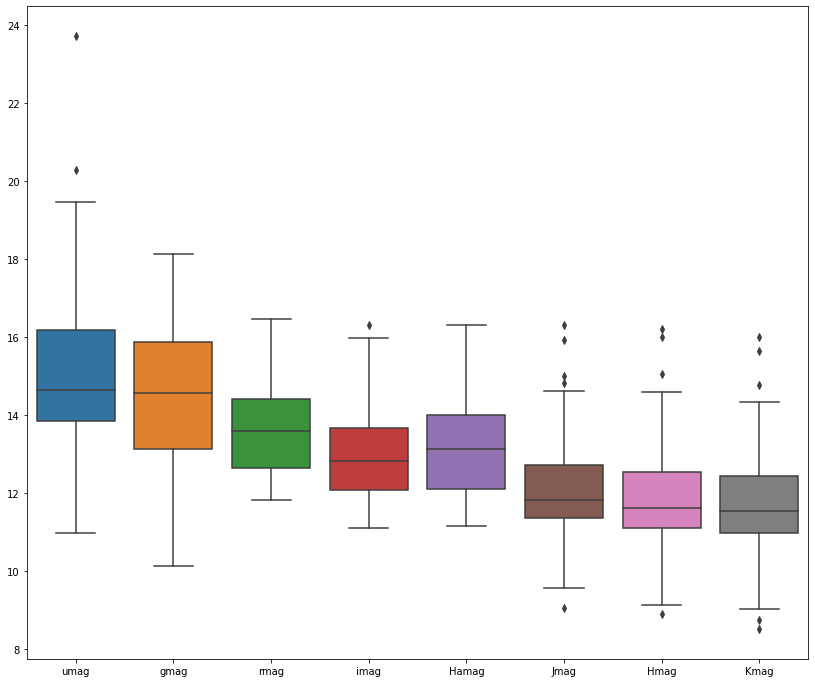

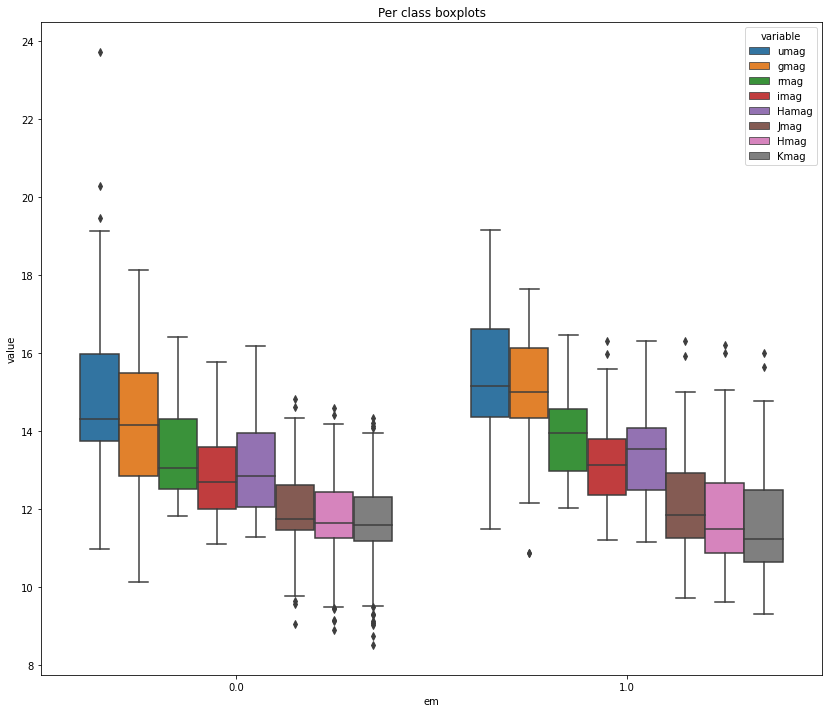

In [70]:

sn.boxplot(data=x)

plt.figure()
xy_long = pd.melt(xy, id_vars='em')
sn.boxplot(x='em', y='value', hue='variable', data=xy_long)
plt.title("Per class boxplots")
        

<AxesSubplot:>

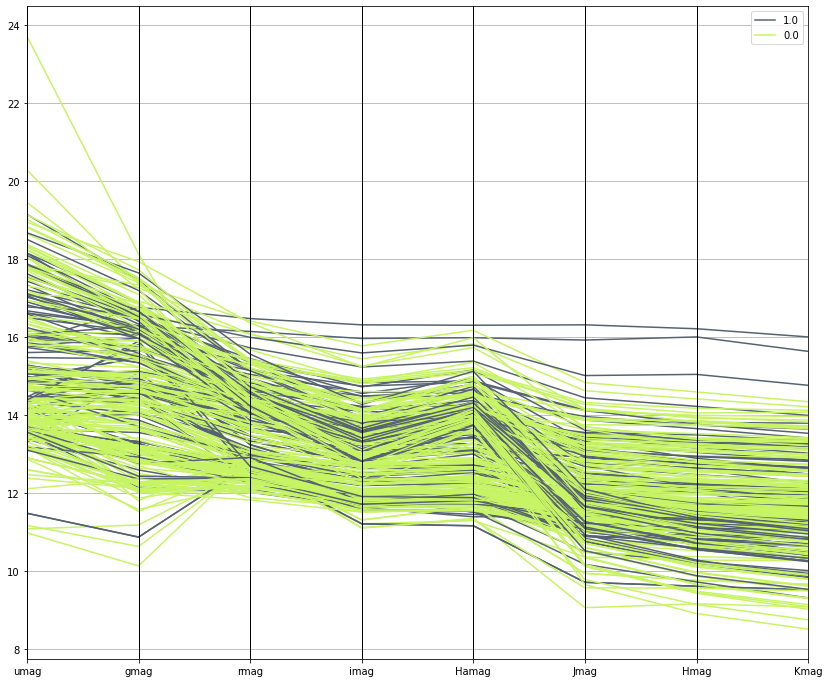

In [71]:
pd.plotting.parallel_coordinates(xy,"em",color=('#556270','#C7F464'))


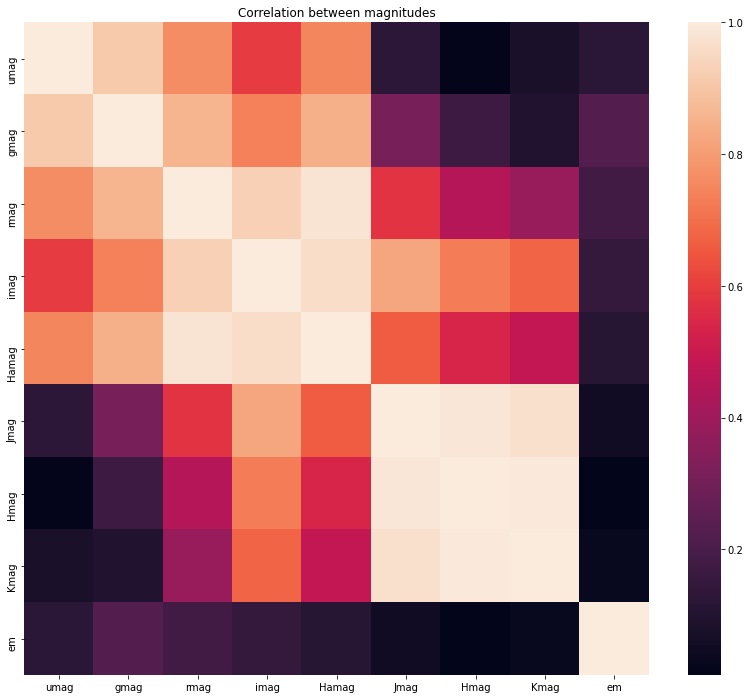

Text(0.5, 0.98, 'Scatterplots between magnitudes')

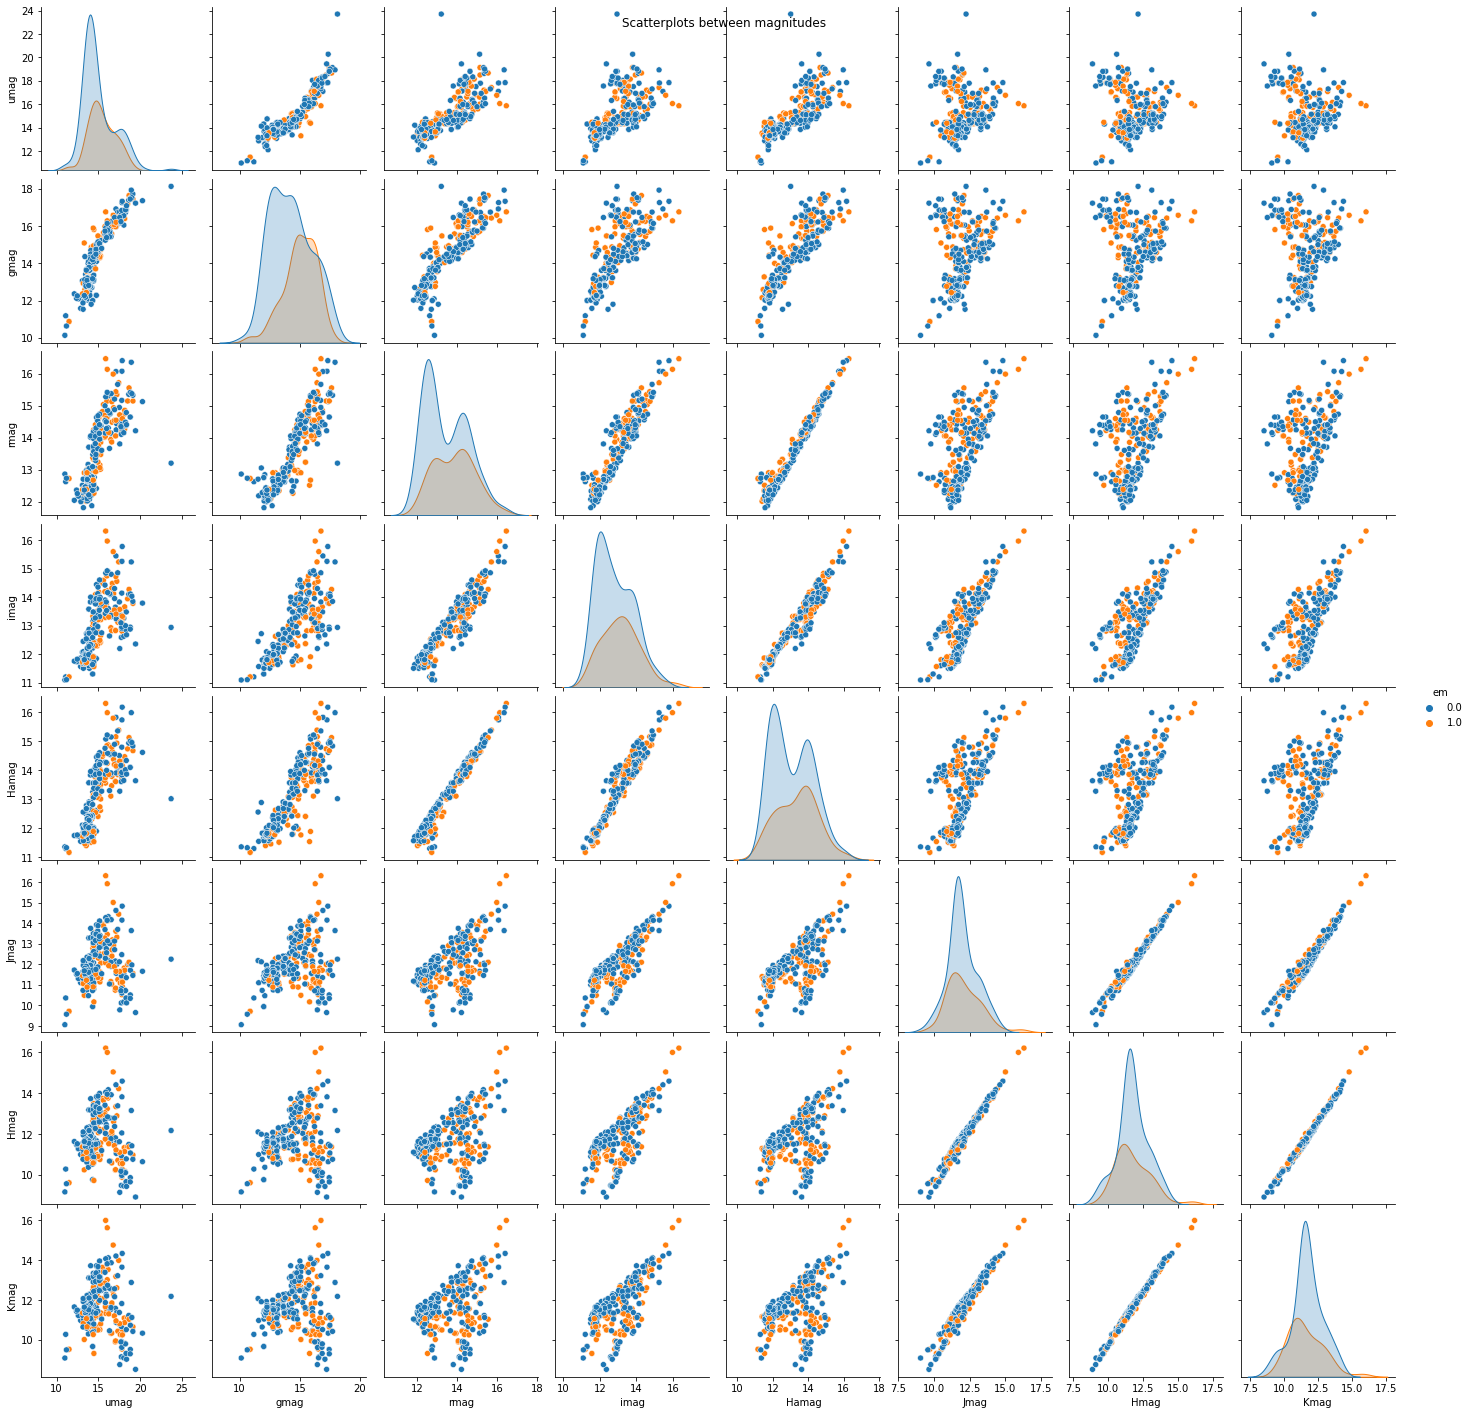

In [72]:
sn.heatmap(xy.corr().abs())
plt.title("Correlation between magnitudes")
plt.show()

sn.pairplot(xy,hue="em")
plt.suptitle("Scatterplots between magnitudes")
# axes=pd.plotting.scatter_matrix(x,c=y["em"],alpha=0.9,grid=False,figsize=(14,12))


# Outlier detection via confidence interval

In [73]:
from scipy import stats
m = len(x.columns) # number of columns = number of hypothesis
confidence= 0.98  
adjusted_confidence = 1- (1-confidence)/m  # bonferroni-adjusted confidence 
max_zscore = stats.norm.ppf(adjusted_confidence)
print(f"Confidence  (desired): {confidence}")
print(f"Confidence (adjusted): {adjusted_confidence}")
print(f"Z-score    (adjusted): {max_zscore}")

indices = (np.abs(stats.zscore(x-x.mean())) > max_zscore).any(axis=1)
outliers_x = x[indices]
if dataset_name != "all_em":
    outliers_metadata = metadata[indices]
    outliers_x = outliers_x.merge(outliers_metadata,left_index=True,right_index=True)
outliers_x

Confidence  (desired): 0.98
Confidence (adjusted): 0.9975
Z-score    (adjusted): 2.807033768343811


,umag,gmag,rmag,imag,Hamag,Jmag,Hmag,Kmag,original_index,Unnamed: 0,_DEJ2000_1,col1,LAMOST_sep,_RAJ2000_1,model_prob
40,23.71,18.13,13.21,12.94,13.01,12.25,12.17,12.18,632.00,634,23.857319,632,2.0,93.283401,0.38
88,15.87,16.76,16.47,16.31,16.30,16.31,16.21,16.00,78.00,78,23.777745,78,2.0,94.851449,0.16
129,20.28,17.36,15.13,13.79,14.61,11.66,10.64,10.33,74.00,74,9.502543,74,2.0,100.553070,0.09
227,16.06,16.28,16.14,15.96,15.98,15.92,16.00,15.63,27.00,27,6.304176,27,2.0,104.223190,0.00


# Outlier detection via IQR

In [74]:
iqr_factor=1.5
q25,q75=x.quantile(0.25),x.quantile(0.75)
iqr=q75-q25
min_values = q25-iqr_factor*iqr
max_values = q75+iqr_factor*iqr
# ou
indices = (np.logical_or(x<min_values,x>max_values)).any(axis=1)
outliers_x = x[indices]
if dataset_name != "all_em":
    outliers_metadata = metadata[indices]
    outliers_x = outliers_x.merge(outliers_metadata,left_index=True,right_index=True)
outliers_x

,umag,gmag,rmag,imag,Hamag,Jmag,Hmag,Kmag,original_index,Unnamed: 0,_DEJ2000_1,col1,LAMOST_sep,_RAJ2000_1,model_prob
40,23.71,18.13,13.21,12.94,13.01,12.25,12.17,12.18,632.00,634,23.857319,632,2.0,93.283401,0.38
76,10.98,10.13,12.87,11.10,11.35,9.06,9.16,9.08,937.00,939,51.133020,937,2.0,59.076031,0.18
88,15.87,16.76,16.47,16.31,16.30,16.31,16.21,16.00,78.00,78,23.777745,78,2.0,94.851449,0.16
129,20.28,17.36,15.13,13.79,14.61,11.66,10.64,10.33,74.00,74,9.502543,74,2.0,100.553070,0.09
227,16.06,16.28,16.14,15.96,15.98,15.92,16.00,15.63,27.00,27,6.304176,27,2.0,104.223190,0.00
244,17.85,17.33,16.41,15.77,16.17,14.83,14.59,14.34,1.032.00,1034,29.005993,1032,2.0,83.374873,0.00
255,16.77,16.58,15.99,15.59,15.79,15.01,15.04,14.76,880.00,882,22.163427,880,2.0,88.270422,0.00
264,19.45,17.23,14.22,12.36,13.63,9.65,8.91,8.51,402.00,403,40.542745,402,2.0,308.255134,0.00
275,17.56,16.46,13.81,12.20,13.27,9.78,9.14,8.75,401.00,402,41.245939,401,2.0,308.147236,0.00


# Analysis of q-features ($q_3$) (all magnitudes)

In [75]:
x_np=x.to_numpy()
import qfeatures
coefficients = dataset_module.coefficients
systems = dataset_module.systems
coefficients_np = np.array([coefficients[k] for k in x.columns])
systems = [systems[k] for k in x.columns]
q=qfeatures.calculate(x_np,coefficients_np,x.columns,systems,combination_size=3)
m = q.magnitudes

q_df = pd.DataFrame(m, columns = q.column_names)
q_df.describe()

,umag_gmag_rmag,umag_gmag_imag,umag_gmag_Hamag,umag_gmag_Jmag,umag_gmag_Hmag,umag_gmag_Kmag,umag_rmag_imag,umag_rmag_Hamag,umag_rmag_Jmag,umag_rmag_Hmag,...,imag_Hamag_Jmag,imag_Hamag_Hmag,imag_Hamag_Kmag,imag_Jmag_Hmag,imag_Jmag_Kmag,imag_Hmag_Kmag,Hamag_Jmag_Hmag,Hamag_Jmag_Kmag,Hamag_Hmag_Kmag,Jmag_Hmag_Kmag
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,...,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,0.176481,-0.396841,-0.070167,-3.153199,-5.836835,-9.613043,0.714044,1.114363,-3.019403,-6.650275,...,0.443990,1.053812,1.917950,0.401837,-0.337591,0.533012,0.426916,-0.633676,0.567980,0.108408
std,0.828204,0.931151,0.837281,2.455464,4.269958,6.795943,1.040089,1.248407,2.347558,4.640293,...,0.271688,0.745449,1.392776,0.320037,0.486605,0.524202,0.473221,0.710417,0.746762,0.133023
min,-3.024675,-4.052690,-3.552477,-9.888333,-17.494783,-28.841438,-4.042982,-3.367383,-12.896667,-18.780435,...,0.004028,-0.038696,0.146471,-0.215217,-2.172941,-1.551438,-0.554348,-3.221895,-2.051373,-0.394379
25%,-0.241861,-0.820643,-0.437056,-4.580278,-8.132826,-13.151503,0.263977,0.471121,-4.200000,-9.076957,...,0.239583,0.489565,0.849346,0.219783,-0.645294,0.213007,0.156522,-1.002876,0.135490,0.024052
50%,0.085887,-0.539825,-0.112897,-2.613333,-4.710435,-7.815948,0.656433,0.916729,-2.366667,-5.164348,...,0.365556,0.825000,1.470065,0.310217,-0.250000,0.389804,0.291739,-0.444510,0.401569,0.073529
75%,0.524026,0.015439,0.255280,-1.504306,-2.732826,-4.600065,1.151287,1.446168,-1.322222,-3.123478,...,0.615278,1.424348,2.493137,0.515435,-0.038235,0.848301,0.648261,-0.143268,0.976667,0.178039
max,3.258442,2.916433,2.972150,2.814444,2.990652,3.563529,10.171579,10.305607,7.726667,5.797391,...,1.117639,3.142174,5.924771,2.255217,2.104706,1.883660,2.598696,2.382810,2.523922,0.756601


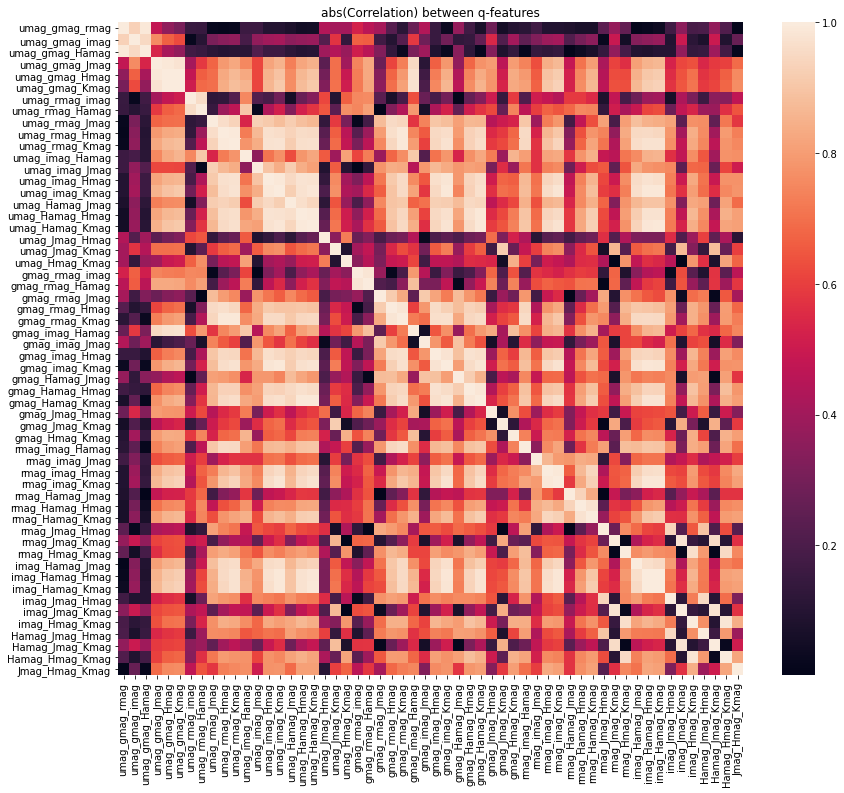

In [76]:
sn.heatmap(q_df.corr().abs())
plt.title("abs(Correlation) between q-features")
plt.show()

# Analysis of q-features ($q_3$) (calculated by system)



In [77]:
x_np=x.to_numpy()
import qfeatures
coefficients = dataset_module.coefficients
systems = dataset_module.systems
coefficients_np = np.array([coefficients[k] for k in x.columns])
systems = [systems[k] for k in x.columns]
q= qfeatures.calculate(x_np,coefficients_np,x.columns,systems,combination_size=3,by_system=True)

m = q.magnitudes

q_df = pd.DataFrame(m, columns = q.column_names)
q_df.describe()


,umag_gmag_rmag,umag_gmag_imag,umag_gmag_Hamag,umag_rmag_imag,umag_rmag_Hamag,umag_imag_Hamag,gmag_rmag_imag,gmag_rmag_Hamag,gmag_imag_Hamag,rmag_imag_Hamag,Jmag_Hmag_Kmag
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,0.176481,-0.396841,-0.070167,0.714044,1.114363,2.489336,0.529148,0.719684,1.757275,0.731161,0.108408
std,0.828204,0.931151,0.837281,1.040089,1.248407,1.798995,0.843922,0.931828,1.322230,0.473361,0.133023
min,-3.024675,-4.052690,-3.552477,-4.042982,-3.367383,-0.452523,-3.764737,-3.443178,-0.845701,0.045981,-0.394379
25%,-0.241861,-0.820643,-0.437056,0.263977,0.471121,1.403084,0.198947,0.252710,0.882290,0.384860,0.024052
50%,0.085887,-0.539825,-0.112897,0.656433,0.916729,1.872710,0.539474,0.632850,1.323178,0.581215,0.073529
75%,0.524026,0.015439,0.255280,1.151287,1.446168,3.013084,0.925263,1.177944,2.436355,0.941776,0.178039
max,3.258442,2.916433,2.972150,10.171579,10.305607,10.857664,4.763684,4.827477,5.813598,2.216075,0.756601


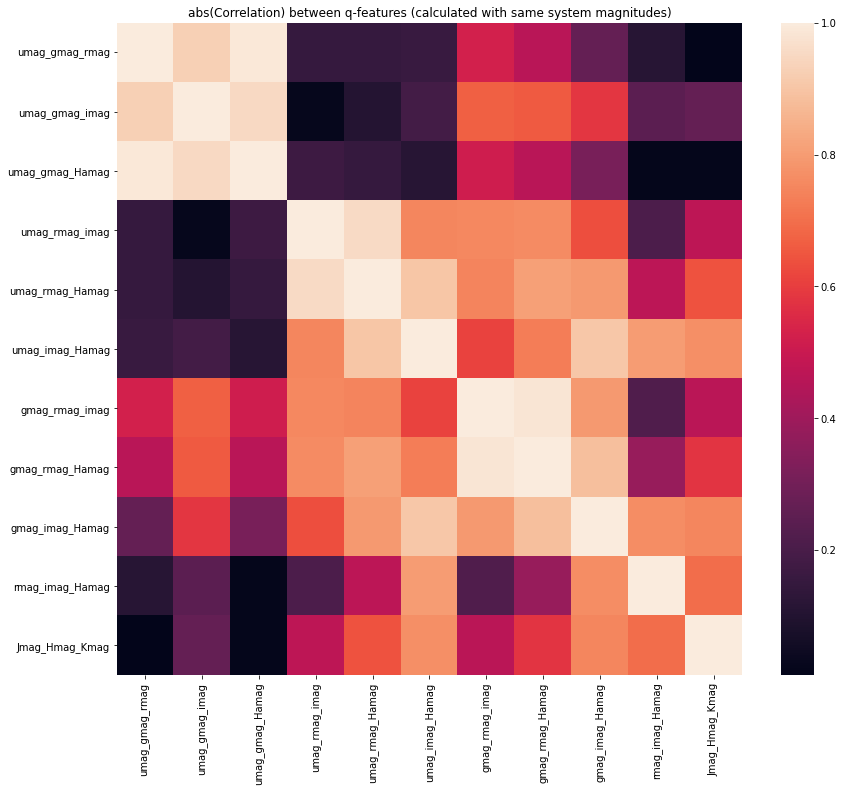

Text(0.5, 0.98, 'Scatter plots between q-features (calculated with same system magnitudes)')

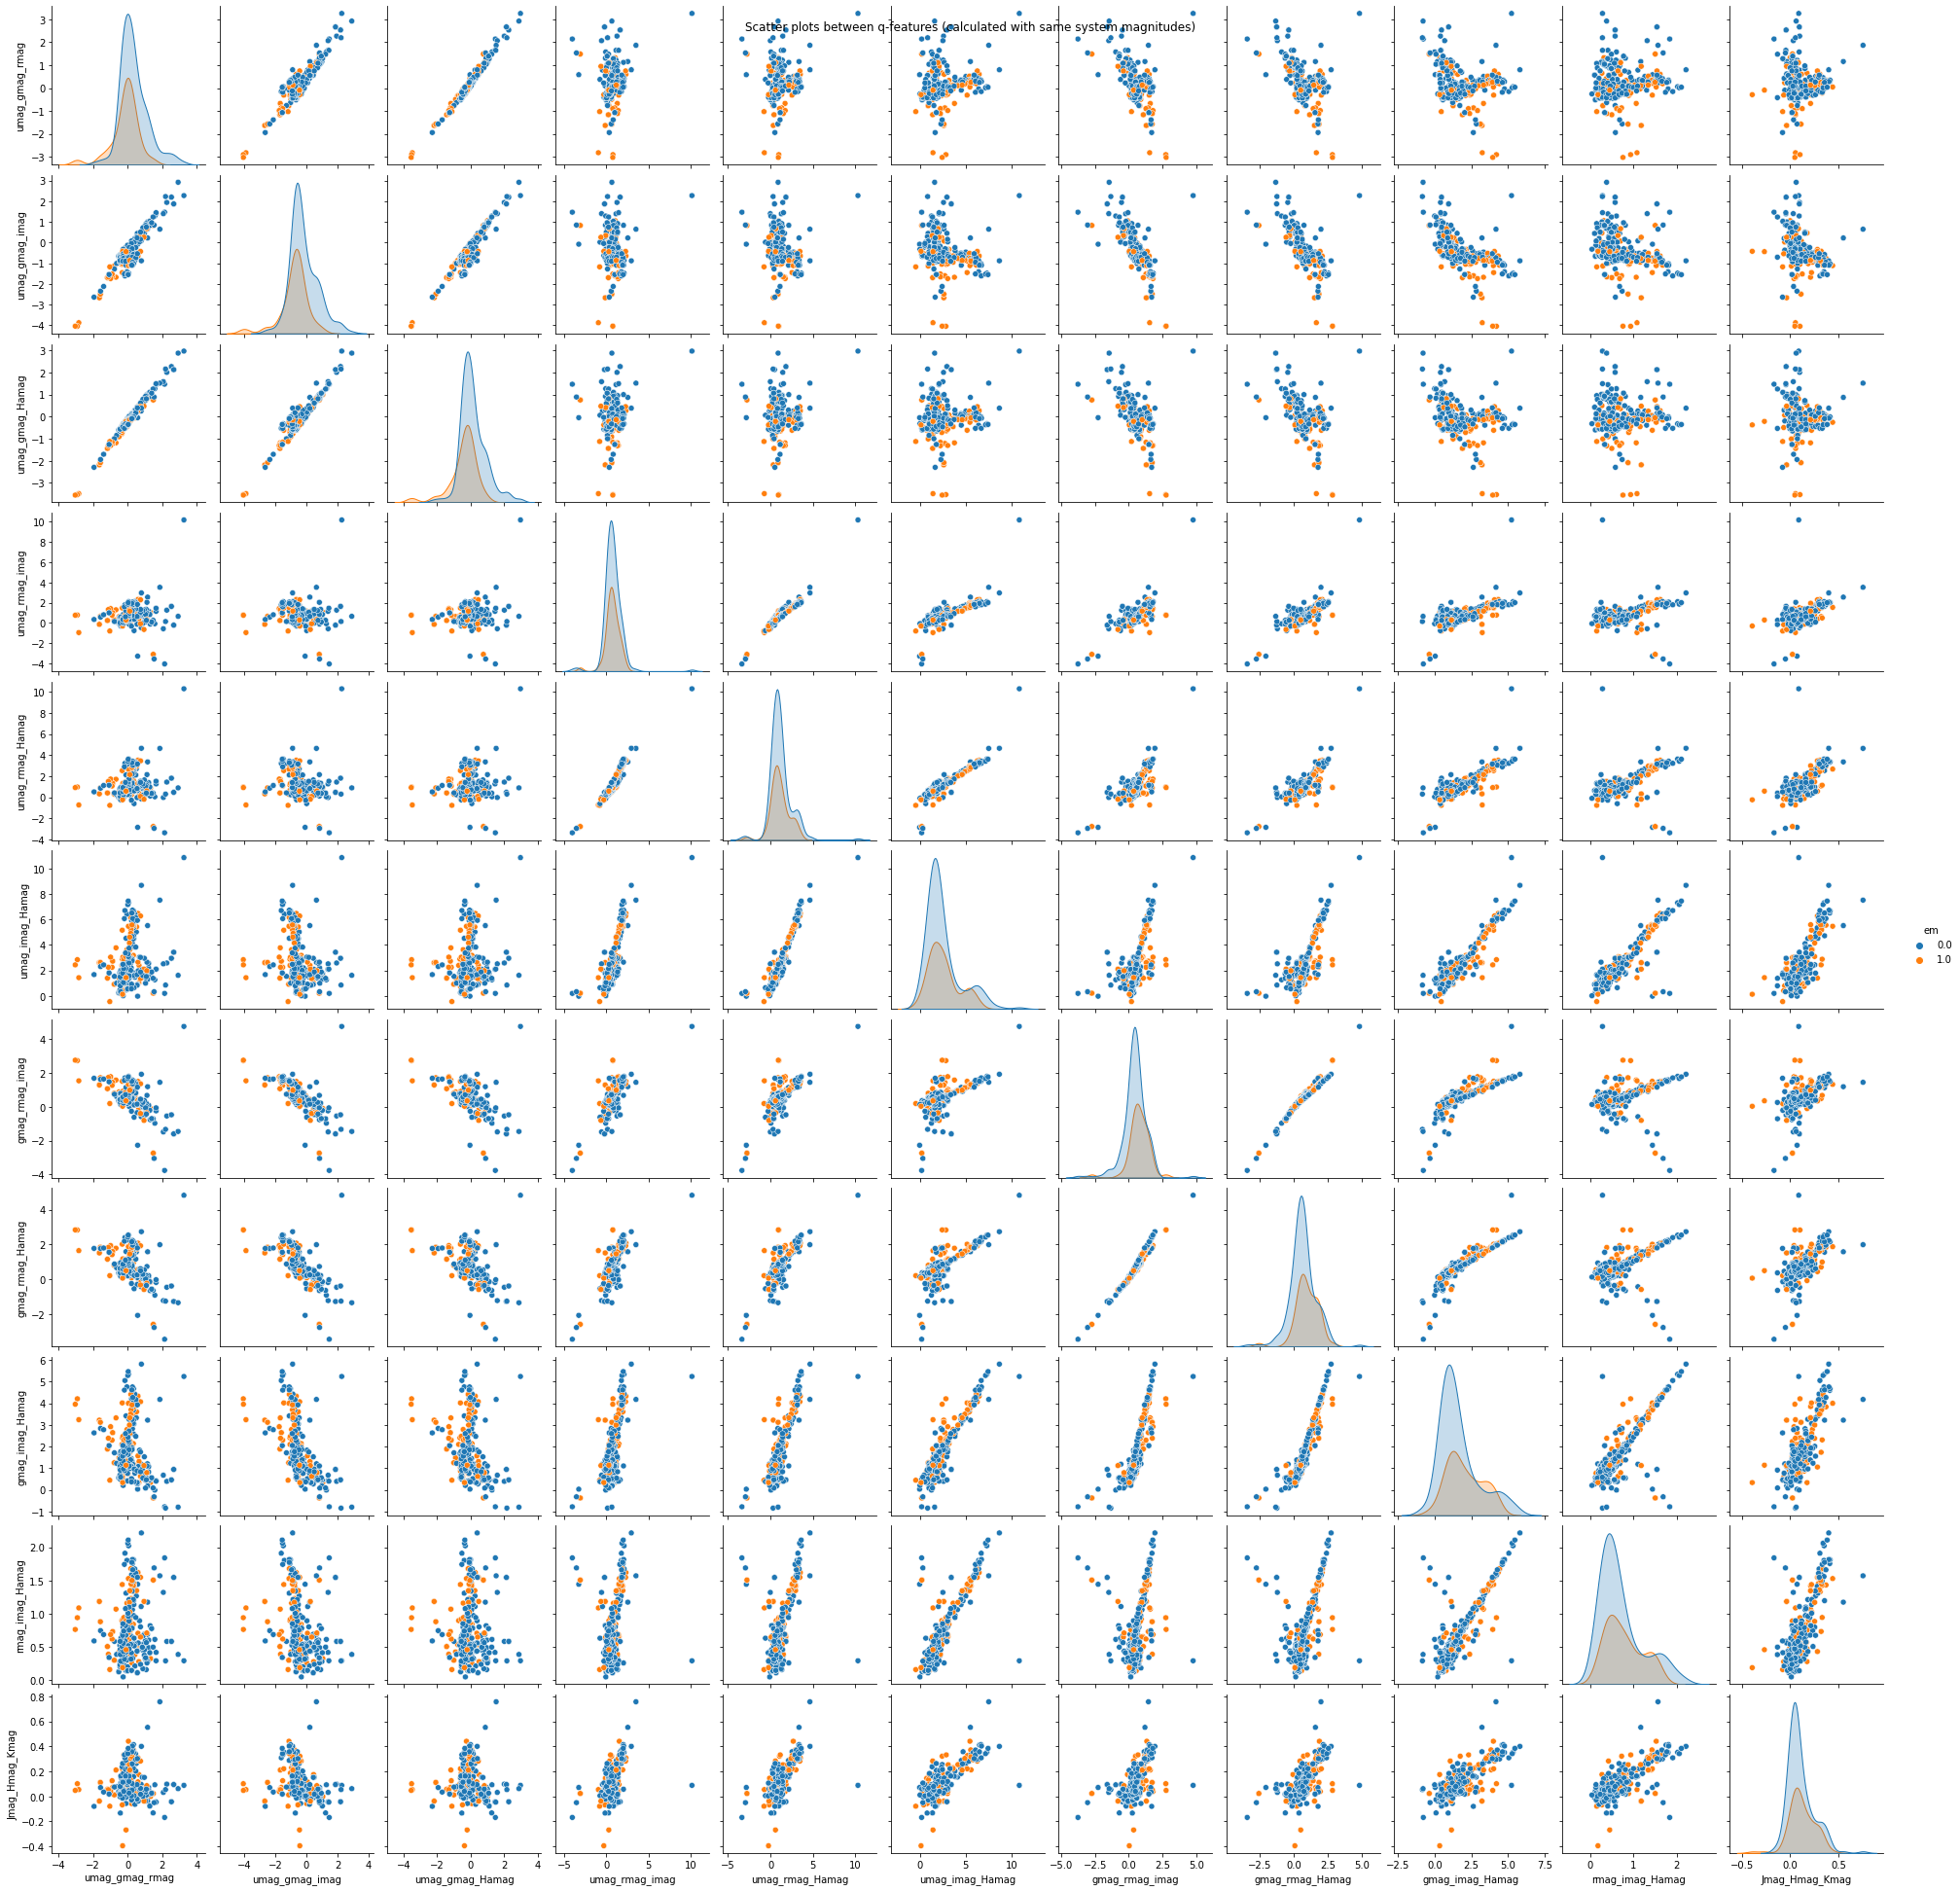

In [78]:
sn.heatmap(q_df.corr().abs())
plt.title("abs(Correlation) between q-features (calculated with same system magnitudes)")
plt.show()
q_dfy=pd.concat([q_df,y],axis=1)
sn.pairplot(q_dfy,hue="em")
plt.suptitle("Scatter plots between q-features (calculated with same system magnitudes)")
